In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Nz = 100
dt = 1
dz = 1
c0 = 1
# dz = min(lmin/Nl, dmin/Nd)
# N = ceil(d / dz)
# dz = d / N
# dt = nbc * dz / (2 * c0)
# tau = 0.5 / fmin
# t0 = tau * 6
# g = exp(-((t - t0)/tau)**2)
LAMBDA = np.ones(Nz)
nmax = 1
NRES = 1
NDRES = 1
dmin = 1
dc = 1
dz1 = min(LAMBDA) / nmax / NRES
dz2 = dmin / NDRES
dz = min(dz1, dz2)
N = np.ceil(dc / dz)
dz = dc / N
print(dz)

1.0


In [3]:
# INITIALIZE MATERIALS TO FREE SPACE
ER = np.ones(Nz) # need to input shape in python
UR = np.ones(Nz)
print(ER)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [4]:
# COMPUTE UPDATE COEFFICIENTS
mEy = (c0 * dt) / ER 
mHx = (c0 * dt) / UR
print(mHx)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [5]:
# INITIALIZE FIELDS
Hx = np.zeros(Nz)
Ey = np.zeros(Nz)

In [6]:
# MAIN FDTD LOOP
# STEPS = 10
# for T in range(STEPS):
#     # Update H from E 
#     for nz in range(Nz):
#         Hx[nz] = Hx[nz] + mHx[nz] * (Ey[nz + 1] - Ey[nz]) / dz
#     # Update E from H
#     for nz in range(Nz):
#         Ey[nz] = Ey[nz] + mEy[nz] * (Hx[nz] - Hx[nz - 1]) / dz


In [7]:
# MAIN FDTD LOOP
STEPS = 10
for T in range(STEPS):
    # Update H from E (Dirichlet Boundary Condtitions)
    for nz in range(Nz - 1):
        Hx[nz] = Hx[nz] + mHx[nz] * (Ey[nz + 1] - Ey[nz]) / dz
    Hx[Nz - 1] = Hx[Nz - 1] + mHx[Nz - 1] * (0 - Ey[Nz - 1]) / dz

    # Update E from H (Dirichlet Boundary Conditions)
    Ey[0] = Ey[0] + mEy[0] * (Hx[0] - 0)  / dz
    for nz in range(1,Nz):
        Ey[nz] = Ey[nz] + mEy[nz] * (Hx[nz] - Hx[nz - 1]) / dz
    

In [8]:
# MAIN FDTD LOOP
STEPS = 10
for T in range(STEPS):
    # Update H from E (Periodic Boundary Condtitions)
    for nz in range(Nz - 1):
        Hx[nz] = Hx[nz] + mHx[nz] * (Ey[nz + 1] - Ey[nz]) / dz
    Hx[Nz - 1] = Hx[Nz - 1] + mHx[Nz - 1] * (Ey[0] - Ey[Nz - 1]) / dz

    # Update E from H (Periodic Boundary Conditions)
    Ey[0] = Ey[0] + mEy[0] * (Hx[0] - Hx[Nz - 1]) / dz
    for nz in range(1,Nz):
        Ey[nz] = Ey[nz] + mEy[nz] * (Hx[nz] - Hx[nz - 1]) / dz
    

In [9]:
# MAIN FDTD LOOP
STEPS = 10
h1 = h2 = h3 = e1 = e2 = e3 = 0.0

for T in range(STEPS):
    # Update H from E (Perfect Boundary Condtitions)
    for nz in range(Nz - 1):
        Hx[nz] = Hx[nz] + mHx[nz] * (Ey[nz + 1] - Ey[nz]) / dz
    Hx[Nz - 1] = Hx[Nz - 1] + mHx[Nz - 1] * (e3 - Ey[Nz - 1]) / dz
    h3 = h2
    h2 = h1
    h1 = Hx[0]
    # Update E from H (Perfect Boundary Conditions)
    Ey[0] = Ey[0] + mEy[0] * (h3 - Hx[Nz - 1]) / dz
    for nz in range(1,Nz):
        Ey[nz] = Ey[nz] + mEy[nz] * (Hx[nz] - Hx[nz - 1]) / dz
    e3 = e2
    e2 = e1
    e1 = Ey[Nz - 1]
    # VISUALIZE


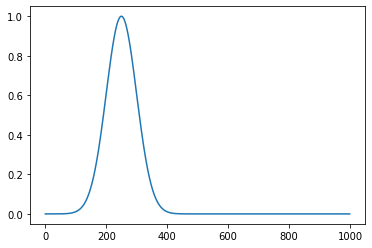

In [10]:
fig = plt.figure()
t = np.linspace(0.0, 20.0, 1000)
gEy = np.exp(-(t - 5)**2 / 2)
plt.plot(gEy)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

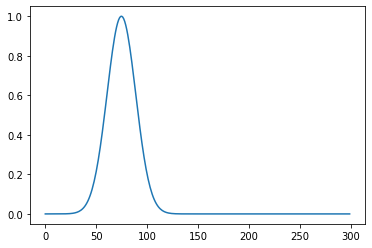

In [11]:

N = 300
dt = 0.5
T = N * dt
t = np.linspace(0.0, T, N)
w = 10
gEy = np.exp( -((t - T / 4) / w)**2 )
gHx = np.exp( -((t - T / 4 + dt) / w)**2 )
plt.plot(gEy)
plt.show

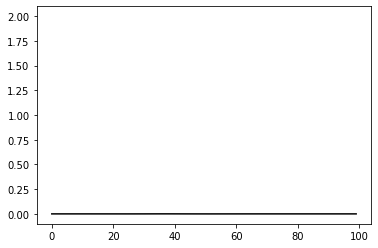

In [12]:
fig = plt.figure()
plts = []
Hx = np.zeros(Nz)
Ey = np.zeros(Nz)
N = 300
dt = 0.5
T = N * dt
t = np.linspace(0.0, T, N)
w = 10
gEy = np.exp( -((t - T / 4) / w)**2 )
gHx = -np.exp( -((t - T / 4 + dt + dt/2) / w)**2 )
mEy = (c0 * dt) / ER 
mHx = (c0 * dt) / UR
STEPS = N
h1 = h2 = h3 = e1 = e2 = e3 = 0.0
src = Nz // 2
for T in range(STEPS - 1):
    # Update H from E (Perfect Boundary Condtitions)
    for nz in range(Nz - 1):
        Hx[nz] = Hx[nz] + mHx[nz] * (Ey[nz + 1] - Ey[nz]) / dz
    Hx[Nz - 1] = (Hx[Nz - 1] + mHx[Nz - 1] * (e3 - Ey[Nz - 1]) / dz) 
    Hx[src] -= mHx[src - 1] * Ey[src] / dz
    h3 = h2
    h2 = h1
    h1 = Hx[0]
    # Update E from H (Perfect Boundary Conditions)
    Ey[0] = Ey[0] + mEy[0] * (Hx[0] - h3) / dz
    for nz in range(1,Nz):
        Ey[nz] = Ey[nz] + mEy[nz] * (Hx[nz] - Hx[nz - 1]) / dz
    Ey[src] -= mEy[src] * Hx[src - 1] / dz
    e3 = e2
    e2 = e1
    e1 = Ey[Nz - 1]
    # Add source
    Ey[src] += gEy[T]
    Hx[src] += gHx[T]
    #Hx[src - 1] = gEy[T + 1] 
    # VISUALIZE
    p, = plt.plot(Ey, 'k')
    plts.append([p])
from matplotlib import animation
ani = animation.ArtistAnimation(fig, plts, interval = 50, repeat_delay = 3000)
ani.save('wave.gif', writer='ffmpeg')
plt.show()

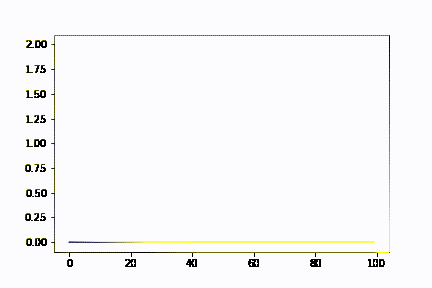

In [13]:
from IPython.display import Image
with open('wave.gif','rb') as file:
    display(Image(file.read()))